# Regression Model Comparison

## Objective:  Predict life expectancy at birth using regression models.  Compare optimized model performance for the following algorithms:

- Random Forest Regressor
- Gradient Boosted

## Procedure:

1.  Load data into dataframe.
2.  Use Pipeline() and GridSearchCV() to optimize model parameters.  
    - Apply StandardScaler(), OneHotEncode(), and Principal Component Analysis (PCA) where appropriate.<br>
    - Record performance scores and model parameters. 
3.  Compare model scores to determine best performing model.

# Import Packages

In [1]:
# pandas, numpy, matplotlib, seaborn, plotly libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


%matplotlib inline

In [2]:
# sklearn libraries

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
!ls


Capstone 2  Exploratory Data Analysis - Ed Gatdula.ipynb
Capstone 2 Data Modeling - Ed Gatdula.ipynb
Capstone 2 Data Modeling_RandomForestRegressor_GradientBoosting Pipeline.ipynb
Capstone 2 Project Ed Gatdula.ipynb
Untitled.ipynb
capstone_2_project_data_files
df_emp_edu_pov
df_final
df_mortality


# Import Dataframe

## Select feature columns

### - Eleven features are selected from df_final, the dataframe containing all compiled data. 

1. 'State'
2. 'County Name'
3. 'e(0)'.  Life expectancy at birth.  This is the target.
4. 'Percent of adults with less than a high school diploma, 2015-19',
5. 'Percent of adults with a high school diploma only, 2015-19',
6. "Percent of adults completing some college or associate's degree, 2015-19",
7. "Percent of adults with a bachelor's degree or higher, 2015-19", 'PCTPOV017_2019',
8. 'Unemployment_rate_2020', 
9. 'Median_Household_Income_2019',
10. 'Med_HH_Income_Percent_of_State_Total_2019'
11. 'PCTPOV017_2019'



In [6]:
df = pd.read_csv('./df_final')

In [8]:
df.columns.values

array(['Unnamed: 0', 'Tract ID', 'STATE2KX_x', 'CNTY2KX', 'TRACT2KX',
       'e(0)', 'se(e(0))', 'Abridged life table flag', 'State',
       'County Name', 'STATE2KX_y', 'STUSAB', 'STATENS', 'FIPS_Code',
       'Area_name_x', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013',
       'Civilian_labor_force_2000', 'Employed_2000', 'Unemployed_2000',
       'Unemployment_rate_2000', 'Civilian_labor_force_2001',
       'Employed_2001', 'Unemployed_2001', 'Unemployment_rate_2001',
       'Civilian_labor_force_2002', 'Employed_2002', 'Unemployed_2002',
       'Unemployment_rate_2002', 'Civilian_labor_force_2003',
       'Employed_2003', 'Unemployed_2003', 'Unemployment_rate_2003',
       'Civilian_labor_force_2004', 'Employed_2004', 'Unemployed_2004',
       'Unemployment_rate_2004', 'Civilian_labor_force_2005',
       'Employed_2005', 'Unemployed_2005', 'Unemployment_rate_2005',
       'Civilian_labor_force_2006', 'Employed_2006', 'Unemployed_2006',
       '

In [14]:
# Select features for use in regression modeling

df_ = df[['e(0)', 'Percent of adults with less than a high school diploma, 2015-19',
         'Percent of adults with a high school diploma only, 2015-19',
         "Percent of adults completing some college or associate's degree, 2015-19",
         "Percent of adults with a bachelor's degree or higher, 2015-19", 'PCTPOV017_2019',
         'Unemployment_rate_2020', 'Median_Household_Income_2019',
         'Med_HH_Income_Percent_of_State_Total_2019']]

print(df_.shape)
df_.sample(5)

(65662, 9)


,e(0),"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOV017_2019,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
46086,79.6,12.730249,35.243553,33.851822,18.174376,17.7,5.0,53073.0,78.740990
26279,72.3,25.027718,42.102150,20.888462,11.981669,38.4,8.1,35484.0,69.429443
37275,81.2,7.489351,22.676764,20.485914,49.347969,5.8,9.6,107971.0,125.860863
61697,83.4,5.400875,16.387283,37.403748,40.808094,8.4,3.7,79505.0,105.019485
27746,79.7,9.012258,13.404374,18.723778,58.859589,9.3,6.3,110012.0,126.970131


In [15]:
# inspect for missing NaN values

df_.isna().sum()

e(0)                                                                         0
Percent of adults with less than a high school diploma, 2015-19             10
Percent of adults with a high school diploma only, 2015-19                  10
Percent of adults completing some college or associate's degree, 2015-19    10
Percent of adults with a bachelor's degree or higher, 2015-19               10
PCTPOV017_2019                                                              10
Unemployment_rate_2020                                                      10
Median_Household_Income_2019                                                10
Med_HH_Income_Percent_of_State_Total_2019                                   10
dtype: int64

In [16]:
# locate df_ rows with NaN values
# drop rows with NaN values

df_[df_.isna().any(axis=1)]

df_ = df_.dropna(axis = 0)

print(df_.shape)
df_.isna().sum()

(65652, 9)


e(0)                                                                        0
Percent of adults with less than a high school diploma, 2015-19             0
Percent of adults with a high school diploma only, 2015-19                  0
Percent of adults completing some college or associate's degree, 2015-19    0
Percent of adults with a bachelor's degree or higher, 2015-19               0
PCTPOV017_2019                                                              0
Unemployment_rate_2020                                                      0
Median_Household_Income_2019                                                0
Med_HH_Income_Percent_of_State_Total_2019                                   0
dtype: int64

In [17]:
df_.columns

Index(['e(0)',
       'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school diploma only, 2015-19',
       'Percent of adults completing some college or associate's degree, 2015-19',
       'Percent of adults with a bachelor's degree or higher, 2015-19',
       'PCTPOV017_2019', 'Unemployment_rate_2020',
       'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019'],
      dtype='object')

# RandomForestRegressor

## Results


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [20]:
# Create Regression Model Results Dataframe

df_summary = pd.DataFrame(columns = ['name', 'parameters', 'train set score', 'test set score', 'RMSE'])

In [21]:
# test, train split data

features = df_.drop('e(0)', axis = 1)
target = df_['e(0)']

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.70)

print("X_train shape: {}, y_train shape:{}".format(X_train.shape, y_train.shape))
print("X_test shape: {}, y_test shape:{}".format(X_test.shape, y_test.shape))


X_train shape: (45956, 8), y_train shape:(45956,)
X_test shape: (19696, 8), y_test shape:(19696,)


In [22]:
# instantiate randomforestregressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# predict using X_test.  evaluate regression model performance

name_ = "Random Forest"
y_pred = forest.predict(X_test)
params_ = forest.get_params
RMSE_score = mean_squared_error(y_test, y_pred, squared=False)
train_score = forest.score(X_train,y_train)
test_score = forest.score(X_test, y_test)

print("RandomForest training set score:{:.2f}".format(forest.score(X_train,y_train)))
print("RandomForest best parameters:{}".format(params_))
print("RandomForest test set score:{:.2f}".format(forest.score(X_test, y_test)))
print("RMSE Score:{}".format(mean_squared_error(y_test, y_pred, squared=False)))

# append RandomForestRegressor() information to df_summary
df_summary = df_summary.append({'name': name_ , 'parameters':params_, 'train set score': test_score,
                                'test set score': train_score,
                                'RMSE': RMSE_score}, ignore_index=True)

RandomForest training set score:0.32
RandomForest best parameters:<bound method BaseEstimator.get_params of RandomForestRegressor()>
RandomForest test set score:0.26
RMSE Score:3.454873415466303


In [23]:
df_summary

,name,parameters,train set score,test set score,RMSE
0,Random Forest,<bound method BaseEstimator.get_params of Rand...,0.256858,0.321038,3.454873


In [24]:
# get features importances, use plotly to visualize


#importances = forest.feature_importances_
#df_features = pd.DataFrame(importances, columns = features.columns)

importances = forest.feature_importances_
test = dict(zip((features.columns),forest.feature_importances_))
print(test)

df_importances = pd.DataFrame.from_dict(test, orient='index')

{'Percent of adults with less than a high school diploma, 2015-19': 0.07654760713290037, 'Percent of adults with a high school diploma only, 2015-19': 0.05473596413081136, "Percent of adults completing some college or associate's degree, 2015-19": 0.05443295115252332, "Percent of adults with a bachelor's degree or higher, 2015-19": 0.04374107475902291, 'PCTPOV017_2019': 0.08699577927016722, 'Unemployment_rate_2020': 0.05496503713262751, 'Median_Household_Income_2019': 0.5507554184291055, 'Med_HH_Income_Percent_of_State_Total_2019': 0.07782616799284195}


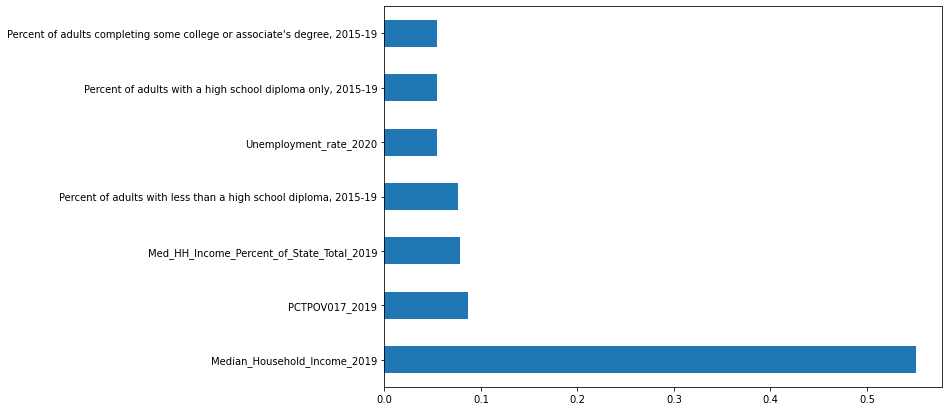

In [25]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(forest.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

## GridSearchCV RandomForestRegressor - Parameter Tuning

In [26]:
# define steps

steps = [('forest', RandomForestRegressor())]

# instantiate pipeline object

pipe = Pipeline(steps)

# define gridsearch parameters dict

param_grid = {'forest__n_estimators':[1,2,5,10,25,50,100],
             'forest__max_features':[1,2,3,4,5,6]}

# split data into test train split

# test, train split data

features = df_.drop('e(0)', axis = 1)
target = df_['e(0)']

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.70)


# instantiate GridSearchCV object using pipeline, parameters dict

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score = True)

# fit cv

grid_search.fit(X_train, y_train)



# evaluate results

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('forest', RandomForestRegressor())]),
             param_grid={'forest__max_features': [1, 2, 3, 4, 5, 6],
                         'forest__n_estimators': [1, 2, 5, 10, 25, 50, 100]},
             return_train_score=True)

In [27]:
# Model performance metrics

y_pred = grid_search.predict(X_test)

model_name = "RandomForestRegressor - GridSearch"
RMSE_score = mean_squared_error(y_test, y_pred, squared=False)
params_ = grid_search.best_params_
train_score = grid_search.score(X_train,y_train)
test_score = grid_search.score(X_test, y_test)

print("Train set score: {:2f}".format(train_score))
print("Test set score: {:.2f}".format(test_score))
print("Best parameters: {}".format(params_))
print("RMSE score: {}".format(RMSE_score))
print("Best cross_validation score: {:.2f}".format(grid_search.best_score_))

#Append model metrics to df_summary

# append RandomForestRegressor() information to df_summary
df_summary = df_summary.append({'name': name_ , 'parameters':params_, 'train set score': test_score,
                                'test set score': train_score,
                                'RMSE': RMSE_score}, ignore_index=True)

Train set score: 0.323519
Test set score: 0.25
Best parameters: {'forest__max_features': 1, 'forest__n_estimators': 100}
RMSE score: 3.4782849442065413
Best cross_validation score: 0.24


In [28]:
df_summary

,name,parameters,train set score,test set score,RMSE
0,Random Forest,<bound method BaseEstimator.get_params of Rand...,0.256858,0.321038,3.454873
1,Random Forest,"{'forest__max_features': 1, 'forest__n_estimat...",0.248632,0.323519,3.478285


# GradientBoostingRegressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
# test, train split data
features = df_.drop('e(0)', axis=1)
target = df_['e(0)']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=0.70)

# instantiate GradientBoostingRegressor. fit on X_train, y_train

gbrt = GradientBoostingRegressor().fit(X_train, y_train)

# model performance metrics calculation

y_pred = gbrt.predict(X_test)
model_name = "GradientBoostingRegressor"
RMSE_score = mean_squared_error(y_test, y_pred, squared=False)
params_ = gbrt.get_params
train_score = gbrt.score(X_train, y_train)
test_score = gbrt.score(X_test, y_test)

print("{} training set score:{:.2f}".format(model_name, train_score))
print("{} test set score:{:.2f}".format(model_name, test_score))
print("{} RMSE Score:{}".format(model_name,
                                mean_squared_error(y_test, y_pred, squared=False)))


# Append model information to df_summary

df_summary = df_summary.append({'name': model_name, 'parameters': params_,
                                'train set score': test_score, 'test set score': train_score,
                                'RMSE': RMSE_score}, ignore_index=True)

GradientBoostingRegressor training set score:0.26
GradientBoostingRegressor test set score:0.25
GradientBoostingRegressor RMSE Score:3.4630295263882336


In [32]:
df_summary

,name,parameters,train set score,test set score,RMSE
0,Random Forest,<bound method BaseEstimator.get_params of Rand...,0.256858,0.321038,3.454873
1,Random Forest,"{'forest__max_features': 1, 'forest__n_estimat...",0.248632,0.323519,3.478285
2,GradientBoostingRegressor,<bound method BaseEstimator.get_params of Grad...,0.245661,0.257841,3.463030


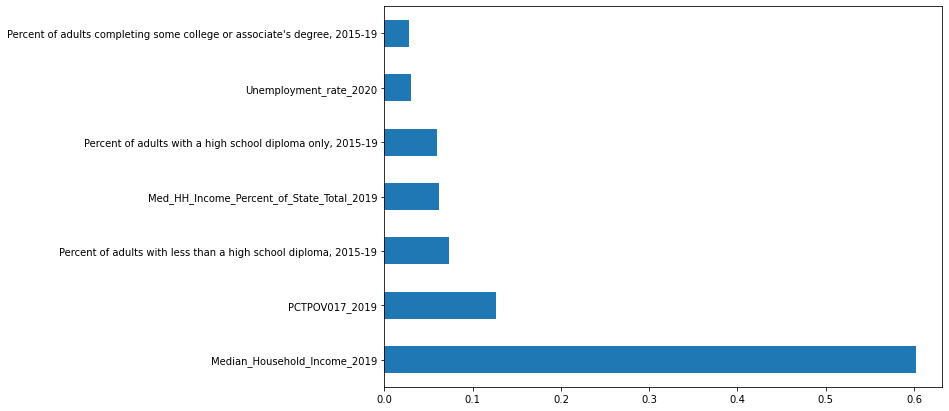

In [33]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(gbrt.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

## GradientBoostingRegressor GridSearchCV

In [35]:
# define steps
steps = [('gbrt', GradientBoostingRegressor())]

# instantiate pipeline object
pipe = Pipeline(steps)

# define gridsearch parameters dict
# most important parameters: n_estimators, learning rate

param_grid = {'gbrt__n_estimators': [100, 200, 300, 400, 500],
              'gbrt__learning_rate': [0.001, 0.01, 0.1, 1]}

# split data into test train split

# test, train split data
features = df_.drop('e(0)', axis=1)
target = df_['e(0)']
X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=0.70)

# instantiate GridSearchCV object using pipeline, parameters dict
grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)

# fit grid_search to trainings sets
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gbrt', GradientBoostingRegressor())]),
             param_grid={'gbrt__learning_rate': [0.001, 0.01, 0.1, 1],
                         'gbrt__n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [36]:
# evaluate model performance metrics

y_pred = grid_search.predict(X_test)

model_name = "GradientBoostingRegressor - GridSearch"
RMSE_score = mean_squared_error(y_test, y_pred, squared=False)
params_ = grid_search.best_params_
train_score = grid_search.score(X_train,y_train)
test_score = grid_search.score(X_test, y_test)

print("Train set score: {:2f}".format(train_score))
print("Test set score: {:.2f}".format(test_score))
print("Best parameters: {}".format(params_))
print("RMSE score: {}".format(RMSE_score))
print("Best cross_validation score: {:.2f}".format(grid_search.best_score_))

#Append model metrics to df_summary

# append RandomForestRegressor() information to df_summary
df_summary = df_summary.append({'name': model_name , 'parameters':params_, 'train set score': test_score,
                                'test set score': train_score,
                                'RMSE': RMSE_score}, ignore_index=True)


Train set score: 0.288939
Test set score: 0.27
Best parameters: {'gbrt__learning_rate': 0.1, 'gbrt__n_estimators': 500}
RMSE score: 3.419149908399081
Best cross_validation score: 0.26


# Model Results Summary:

### A combination of Gradient Boosting and GridSearch CV determined the most effective learning rate and n estimators to be 0.1 and 500, respectively.  These parameters produced the model with lowest RMSE,  3.419150.  The train and test set scores are 0.266425 and 0.288939.  Results are summarized in the table below.

In [37]:
# Regression Model Results Dataframe
df_summary

,name,parameters,train set score,test set score,RMSE
0,Random Forest,<bound method BaseEstimator.get_params of Rand...,0.256858,0.321038,3.454873
1,Random Forest,"{'forest__max_features': 1, 'forest__n_estimat...",0.248632,0.323519,3.478285
2,GradientBoostingRegressor,<bound method BaseEstimator.get_params of Grad...,0.245661,0.257841,3.463030
3,Random Forest,"{'gbrt__learning_rate': 0.1, 'gbrt__n_estimato...",0.266425,0.288939,3.419150


In [38]:
df_summary.loc[df_summary.RMSE == df_summary.RMSE.min()]

,name,parameters,train set score,test set score,RMSE
3,Random Forest,"{'gbrt__learning_rate': 0.1, 'gbrt__n_estimato...",0.266425,0.288939,3.41915
